In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

DictVectorizer

In [3]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse = False)
data_transformed=dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

Heart Disease Dataset

In [4]:
#heart disease data set
cols =[ 'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None, names = cols)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
heart_data.ca.unique(),heart_data.thal.unique()

(array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object),
 array(['6.0', '3.0', '7.0', '?'], dtype=object))

In [8]:
heart_data[heart_data.ca=='?']['ca'].count(),heart_data[heart_data.thal=='?']['thal'].count()

(4, 2)

In [9]:
heart_data.replace('?',np.nan,inplace=True)

Simple Imputer

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent', add_indicator = True)
heart_data_imputed=imputer.fit_transform(heart_data)
heart_data_imputed.shape

(303, 16)

Ablone Dataset

In [11]:
#Ablone dataset
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ablone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header = None, names = cols)
ablone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
ablone_data = ablone_data.replace({"Sex":{"M": 1, "F": 2, "I": 3}})
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [14]:
y=ablone_data.pop("Rings")

In [15]:
ablone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Kernel Density Estimation Plot

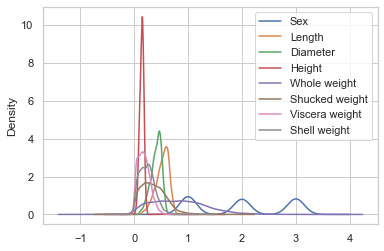

In [19]:
sns.set(style='whitegrid')
ax = ablone_data.plot.kde()    #kernel density

Box Plot

<AxesSubplot:>

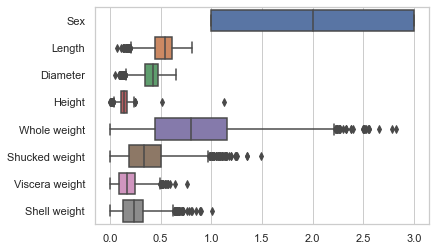

In [20]:
sns.boxplot(data = ablone_data, orient = "h")       #orient to change orientation - horizontal/vertical

Violin Plot

<AxesSubplot:>

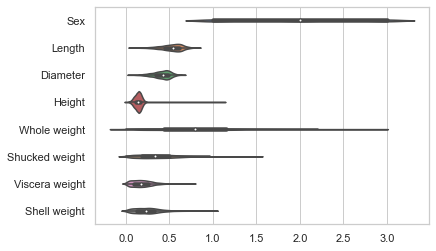

In [21]:
sns.violinplot(data = ablone_data, orient = "h")   #KDE + boxplot

MaxAbsScaler


<AxesSubplot:>

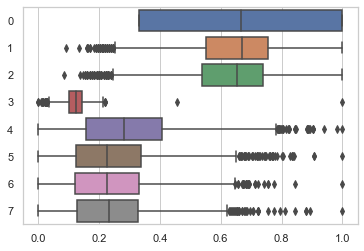

In [30]:
from sklearn.preprocessing import MaxAbsScaler
x=ablone_data
mas=MaxAbsScaler()
x_new=mas.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")

MinMaxScaler

<AxesSubplot:>

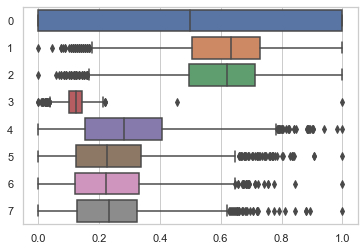

In [31]:
from sklearn.preprocessing import MinMaxScaler
x=ablone_data
mms=MinMaxScaler()
x_new=mms.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")

StandardScaler

<AxesSubplot:>

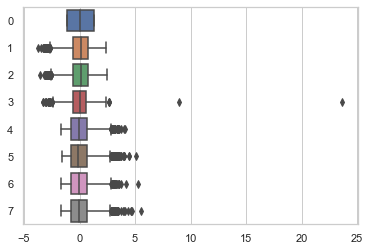

In [32]:
from sklearn.preprocessing import StandardScaler
x=ablone_data
ss=StandardScaler()
x_new=ss.fit_transform(x)
sns.boxplot(data = x_new, orient = "h")